In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from help_functions.prepare_data import most_recent_thursday
from help_functions.evaluate_daxmodels import evaluate_different_daxmodels, evaluate_daxmodel

from dax.help_functions.get_dax_data import get_data
from dax.help_functions.calculate_returns import calculate_returns, calculate_return
from dax.models.dax_model1 import get_dax_forecasts_model1
from dax.models.basicGARCH import get_dax_forecasts_basicGARCH

In [2]:
dax_df = get_data()
dax_df = calculate_returns(dax_df, lags=5)
start_date_excl = most_recent_thursday(dax_df)
dax_df_cval = dax_df.loc[(dax_df.index >= dax_df.index[5000])
                         & (dax_df.index < start_date_excl)]

In [4]:
# check if functions work
model1 = {
    'name': 'model1',
    'function': get_dax_forecasts_model1
}
modelgarch = {
    'name': 'GARCH(1,1) model',
    'function': get_dax_forecasts_basicGARCH
}
models = [model1, modelgarch]

#evaluation1 = evaluate_daxmodel(model1, dax_df_cval, last_x=100, weeks=True)
evaluation2 = evaluate_different_daxmodels(
    models, dax_df_cval, last_x=100, weeks=True)   

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2247881313.2268076
Iteration:      2,   Func. Count:     12,   Neg. LLF: 861439703.7668741
Iteration:      3,   Func. Count:     18,   Neg. LLF: 6479.249119966033
Iteration:      4,   Func. Count:     24,   Neg. LLF: 6463.246722742315
Iteration:      5,   Func. Count:     29,   Neg. LLF: 6463.0797220377135
Iteration:      6,   Func. Count:     33,   Neg. LLF: 6463.079699347625
Iteration:      7,   Func. Count:     36,   Neg. LLF: 6463.07969934762
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6463.079699347625
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      5,   Neg. LLF: 2245709879.860386
Iteration:      2,   Func. Count:     12,   Neg. LLF: 858270603.7176459
Iteration:      3,   Func. Count:     18,   Neg. LLF: 6473.3266932700735
Iteration:      4,   Func. Count:     24,   Neg. LLF: 6457.766974049972

## Visualize Comparsion

In [5]:
# create table only containing different scores of different models

horizons = ['1 day', '2 day', '5 day', '6 day', '7 day']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

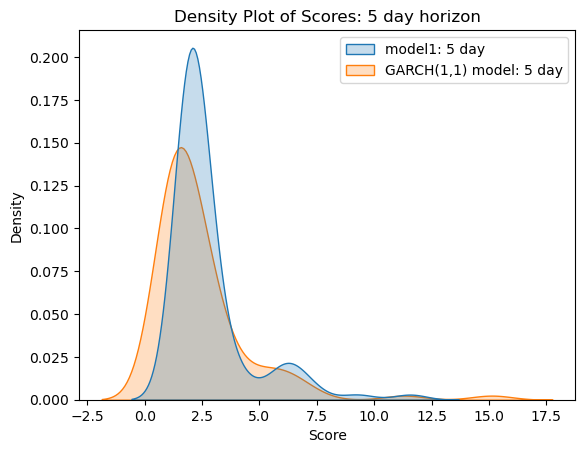

In [6]:
sns.kdeplot(data=score_df.loc[:, ['model1: 5 day',
            'GARCH(1,1) model: 5 day']], fill=True)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Density Plot of Scores: 5 day horizon')

# Display the plot
plt.show()

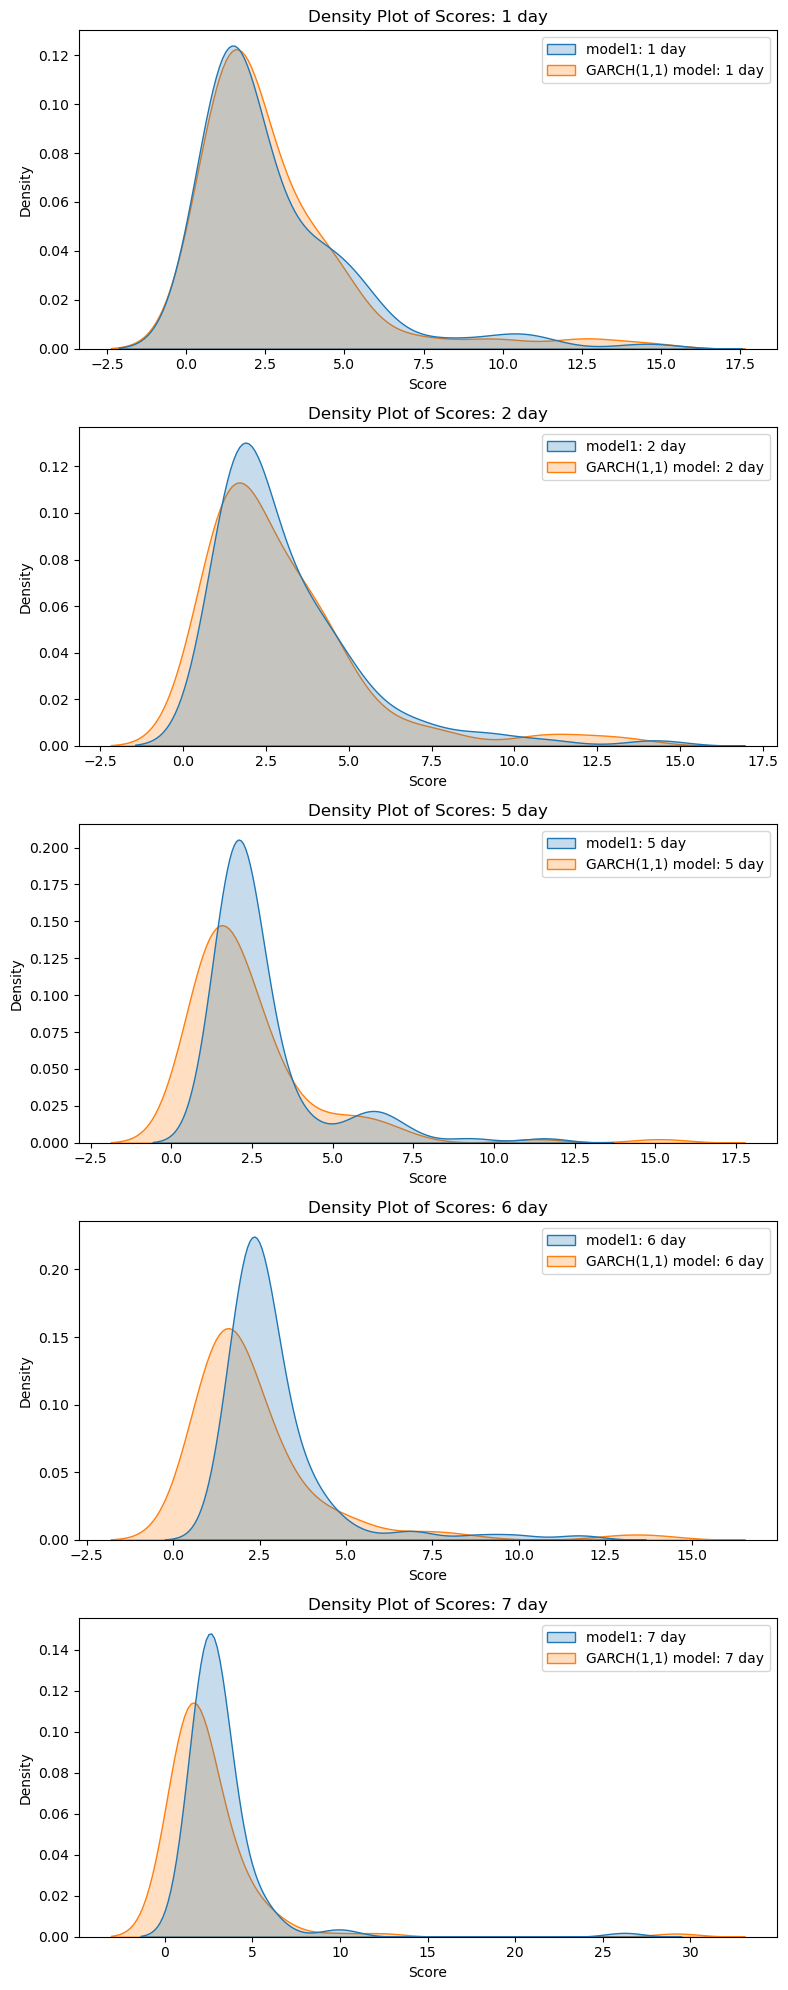

In [7]:
# Set up the number of rows and columns for subplots
num_rows = len(horizons)
num_cols = 1  # One column to display plots one after the other

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4 * num_rows))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through each horizon
for i, h in enumerate(horizons):
    # Select columns related to the current horizon
    relevant_cols = [f'{m["name"]}: {h}' for m in models]

    # Filter the relevant data for the current horizon
    data_subset = score_df.loc[:, relevant_cols]

    # Create a KDE plot for the current horizon
    sns.kdeplot(data=data_subset, fill=True, ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of Scores: {h}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

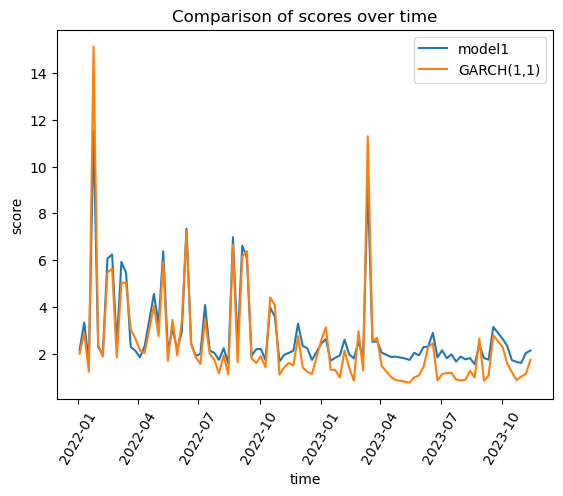

In [9]:
# Plot values from two columns over time
score_df_1d_no_na = score_df[score_df['model1: 5 day'].notna()]
score_df_garch_no_na = score_df[score_df['GARCH(1,1) model: 5 day'].notna()]

plt.plot(score_df_1d_no_na.index,
         score_df_1d_no_na['model1: 5 day'], label='model1')
plt.plot(score_df_garch_no_na.index, score_df_garch_no_na['GARCH(1,1) model: 5 day'], label='GARCH(1,1)')

# Adding labels and title
plt.xlabel('time')
plt.xticks(rotation=60)
plt.ylabel('score')
plt.title('Comparison of scores over time')

# Display legend
plt.legend()

# Show the plot
plt.show()

### Interpretation
GARCH(1,1) better than baseline (model1). 